In [9]:
from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import pytz
import seaborn as sns
from tinydb import TinyDB

from nlg_data import util
from nlg_data.models import Experiment

db_path = Path("../data/db.json")
db = TinyDB(db_path)

game = util.get_game_by_name(db, "G14")
game

NonlocalGame(id=UUID('a820d903-1834-4ab1-8679-2d9c888306a5'), name='G14', optimal_classical_value=0.9772727272727273, optimal_quantum_value=1.0, publication=Publication(citation='L. Mančinska and D. E. Roberson, Baltic Journal on Modern Computing, 4(4), 846-859, 2016', url=Url('https://arxiv.org/abs/1801.03542')), tags=['graph-coloring'], objects=[Object(name='graph', description='NetworkX definition of the G14 graph', path=WindowsPath('games/g14/g14.nx'))])

In [10]:
from tinydb import Query


def parse_dt(s: str):
    utc = pytz.UTC
    dt = datetime.fromisoformat(s)
    return dt.replace(tzinfo=utc)


Exp = Query()
HadValidCircuits = (
    Exp.device.provider.one_of(["ibm", "rigetti"])
    & (
        (Exp.date.map(parse_dt) >= datetime(2024, 9, 27, tzinfo=pytz.UTC))
        | (Exp.date.map(parse_dt) <= datetime(2024, 1, 1, tzinfo=pytz.UTC))
    )
) | ~Exp.device.provider.one_of(["ibm", "rigetti"])
# docs = db.table("experiments").search(HadValidCircuits)
docs = db.table("experiments")
len(docs)

40

In [11]:
rows = []
for doc in docs:
    exp = Experiment(**doc)
    row = {
        "id": doc.doc_id,
        "date": exp.date.replace(tzinfo=pytz.UTC),
        "strategy": exp.circuit_data.strategy,
        "platform": exp.device.type,
        "provider": exp.device.provider,
        "device": exp.device.name,
        "winrate_str": exp.win_rate.to_str(decimals=1),
        "winrate": exp.win_rate.value,
        "ci95": exp.win_rate.ci95,
        "vertex_win_rate": exp.attributes["vertex_win_rate"],
        "edge_win_rate": exp.attributes["edge_win_rate"],
    }
    rows.append(row)

df = pd.DataFrame.from_records(rows)
df.set_index("id", inplace=True)
df['year'] = df.date.dt.year
df['date'] = df.date.dt.date
df.sort_values(by=["date"], inplace=True)
df

,date,strategy,platform,provider,device,winrate_str,winrate,ci95,vertex_win_rate,edge_win_rate,year
id,,,,,,,,,,,
1,2023-09-06,4q,superconducting,ibm,jakarta,84.2(6),0.842729,0.005584,0.634696,0.882087,2023
10,2023-09-06,4q,superconducting,ibm,lima,85.8(6),0.858265,0.005468,0.679897,0.892011,2023
11,2023-09-06,4q,superconducting,ibm,nairobi,84.5(6),0.845159,0.005569,0.651855,0.881730,2023
7,2023-09-06,4q,superconducting,ibm,cairo,84.3(6),0.843817,0.005583,0.648926,0.880688,2023
6,2023-09-06,4q,superconducting,ibm,belem,87.3(6),0.873957,0.005334,0.715541,0.903927,2023
5,2023-09-06,4q,superconducting,ibm,quito,84.6(6),0.846746,0.005559,0.651576,0.883670,2023
4,2023-09-06,4q,superconducting,ibm,auckland,83.9(6),0.839822,0.005601,0.629116,0.879685,2023
3,2023-09-06,4q,superconducting,ibm,hanoi,92.5(5),0.925415,0.004745,0.828613,0.943729,2023
8,2023-09-06,4q,superconducting,ibm,mumbai,85.6(6),0.856889,0.005482,0.676688,0.890981,2023


In [12]:
def keep_best(df: pd.DataFrame) -> pd.Series:
    idx = df.winrate.argmax()
    return df.iloc[idx]

raw_data = df
df = df.groupby(["provider", "device"]).apply(keep_best).reset_index(drop=True)
df = df.set_index(["year", "platform", "provider"]).sort_values("date")
df[["date", "strategy", "device", "winrate_str"]]

C:\Users\furc521\AppData\Local\Temp\ipykernel_19080\3657941524.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["provider", "device"]).apply(keep_best).reset_index(drop=True)


date   strategy      device winrate_str
year platform        provider                                               
2023 superconducting ibm       2023-09-06         4q     jakarta     84.2(6)
                     ibm       2023-09-06         4q    auckland     83.9(6)
                     ibm       2023-09-06         4q       belem     87.3(6)
                     ibm       2023-09-06         4q       cairo     84.3(6)
                     ibm       2023-09-06         4q   guadalupe     78.1(6)
                     ibm       2023-09-06         4q       hanoi     92.5(5)
                     ibm       2023-09-06         4q       quito     84.6(6)
                     ibm       2023-09-06         4q        lima     85.8(6)
                     ibm       2023-09-06         4q      mumbai     85.6(6)
                     ibm       2023-09-06         4q     nairobi     84.5(6)
                     ibm       2023-09-07         4q      manila     84.2(6)
2024 trapped-ion     duke      2024-07-18  bell_pair      silver     94.5(4)
     superconducting ibm       2024-09-28  bell_pair  sherbrooke     94.3(2)
                     rigetti   2024-09-30  bell_pair     ankaa-3     91.8(3)
                     rigetti   2024-09-30  bell_pair     ankaa-2     80.9(4)
     trapped-ion     duke      2024-10-09  bell_pair        blue     97.9(3)
                     ionq      2024-11-04  bell_pair        aria     94.4(1)
                     duke      2024-11-18  bell_pair        gold     93.5(4)

In [13]:
df.reset_index()

,year,platform,provider,date,strategy,device,winrate_str,winrate,ci95,vertex_win_rate,edge_win_rate
0,2023,superconducting,ibm,2023-09-06,4q,jakarta,84.2(6),0.842729,0.005584,0.634696,0.882087
1,2023,superconducting,ibm,2023-09-06,4q,auckland,83.9(6),0.839822,0.005601,0.629116,0.879685
2,2023,superconducting,ibm,2023-09-06,4q,belem,87.3(6),0.873957,0.005334,0.715541,0.903927
3,2023,superconducting,ibm,2023-09-06,4q,cairo,84.3(6),0.843817,0.005583,0.648926,0.880688
4,2023,superconducting,ibm,2023-09-06,4q,guadalupe,78.1(6),0.781827,0.005948,0.507882,0.833654
5,2023,superconducting,ibm,2023-09-06,4q,hanoi,92.5(5),0.925415,0.004745,0.828613,0.943729
6,2023,superconducting,ibm,2023-09-06,4q,quito,84.6(6),0.846746,0.005559,0.651576,0.883670
7,2023,superconducting,ibm,2023-09-06,4q,lima,85.8(6),0.858265,0.005468,0.679897,0.892011
8,2023,superconducting,ibm,2023-09-06,4q,mumbai,85.6(6),0.856889,0.005482,0.676688,0.890981
9,2023,superconducting,ibm,2023-09-06,4q,nairobi,84.5(6),0.845159,0.005569,0.651855,0.881730


In [14]:
from collections import OrderedDict

brand_colors = OrderedDict({
    "rigetti": "#01B5AD",
    "ibm": "#6F5EFE",
    "ionq": "#EE7C37",
    "duke": "#032169",
})

brand_name_proper = {
    "rigetti": "Rigetti",
    "ibm": "IBM",
    "ionq": "IonQ",
    "duke": "Duke",
}

# Color palette with gray at the end
palette = sns.color_palette(list(brand_colors.values()) + ["#bbbbbb"], len(brand_colors) + 1)

def assign_color_idx(row: pd.Series):
    if row.strategy == "4q":
        return len(brand_colors) + 1
    return list(brand_colors.keys()).index(row.provider)

### Barplot

Time is the x axis

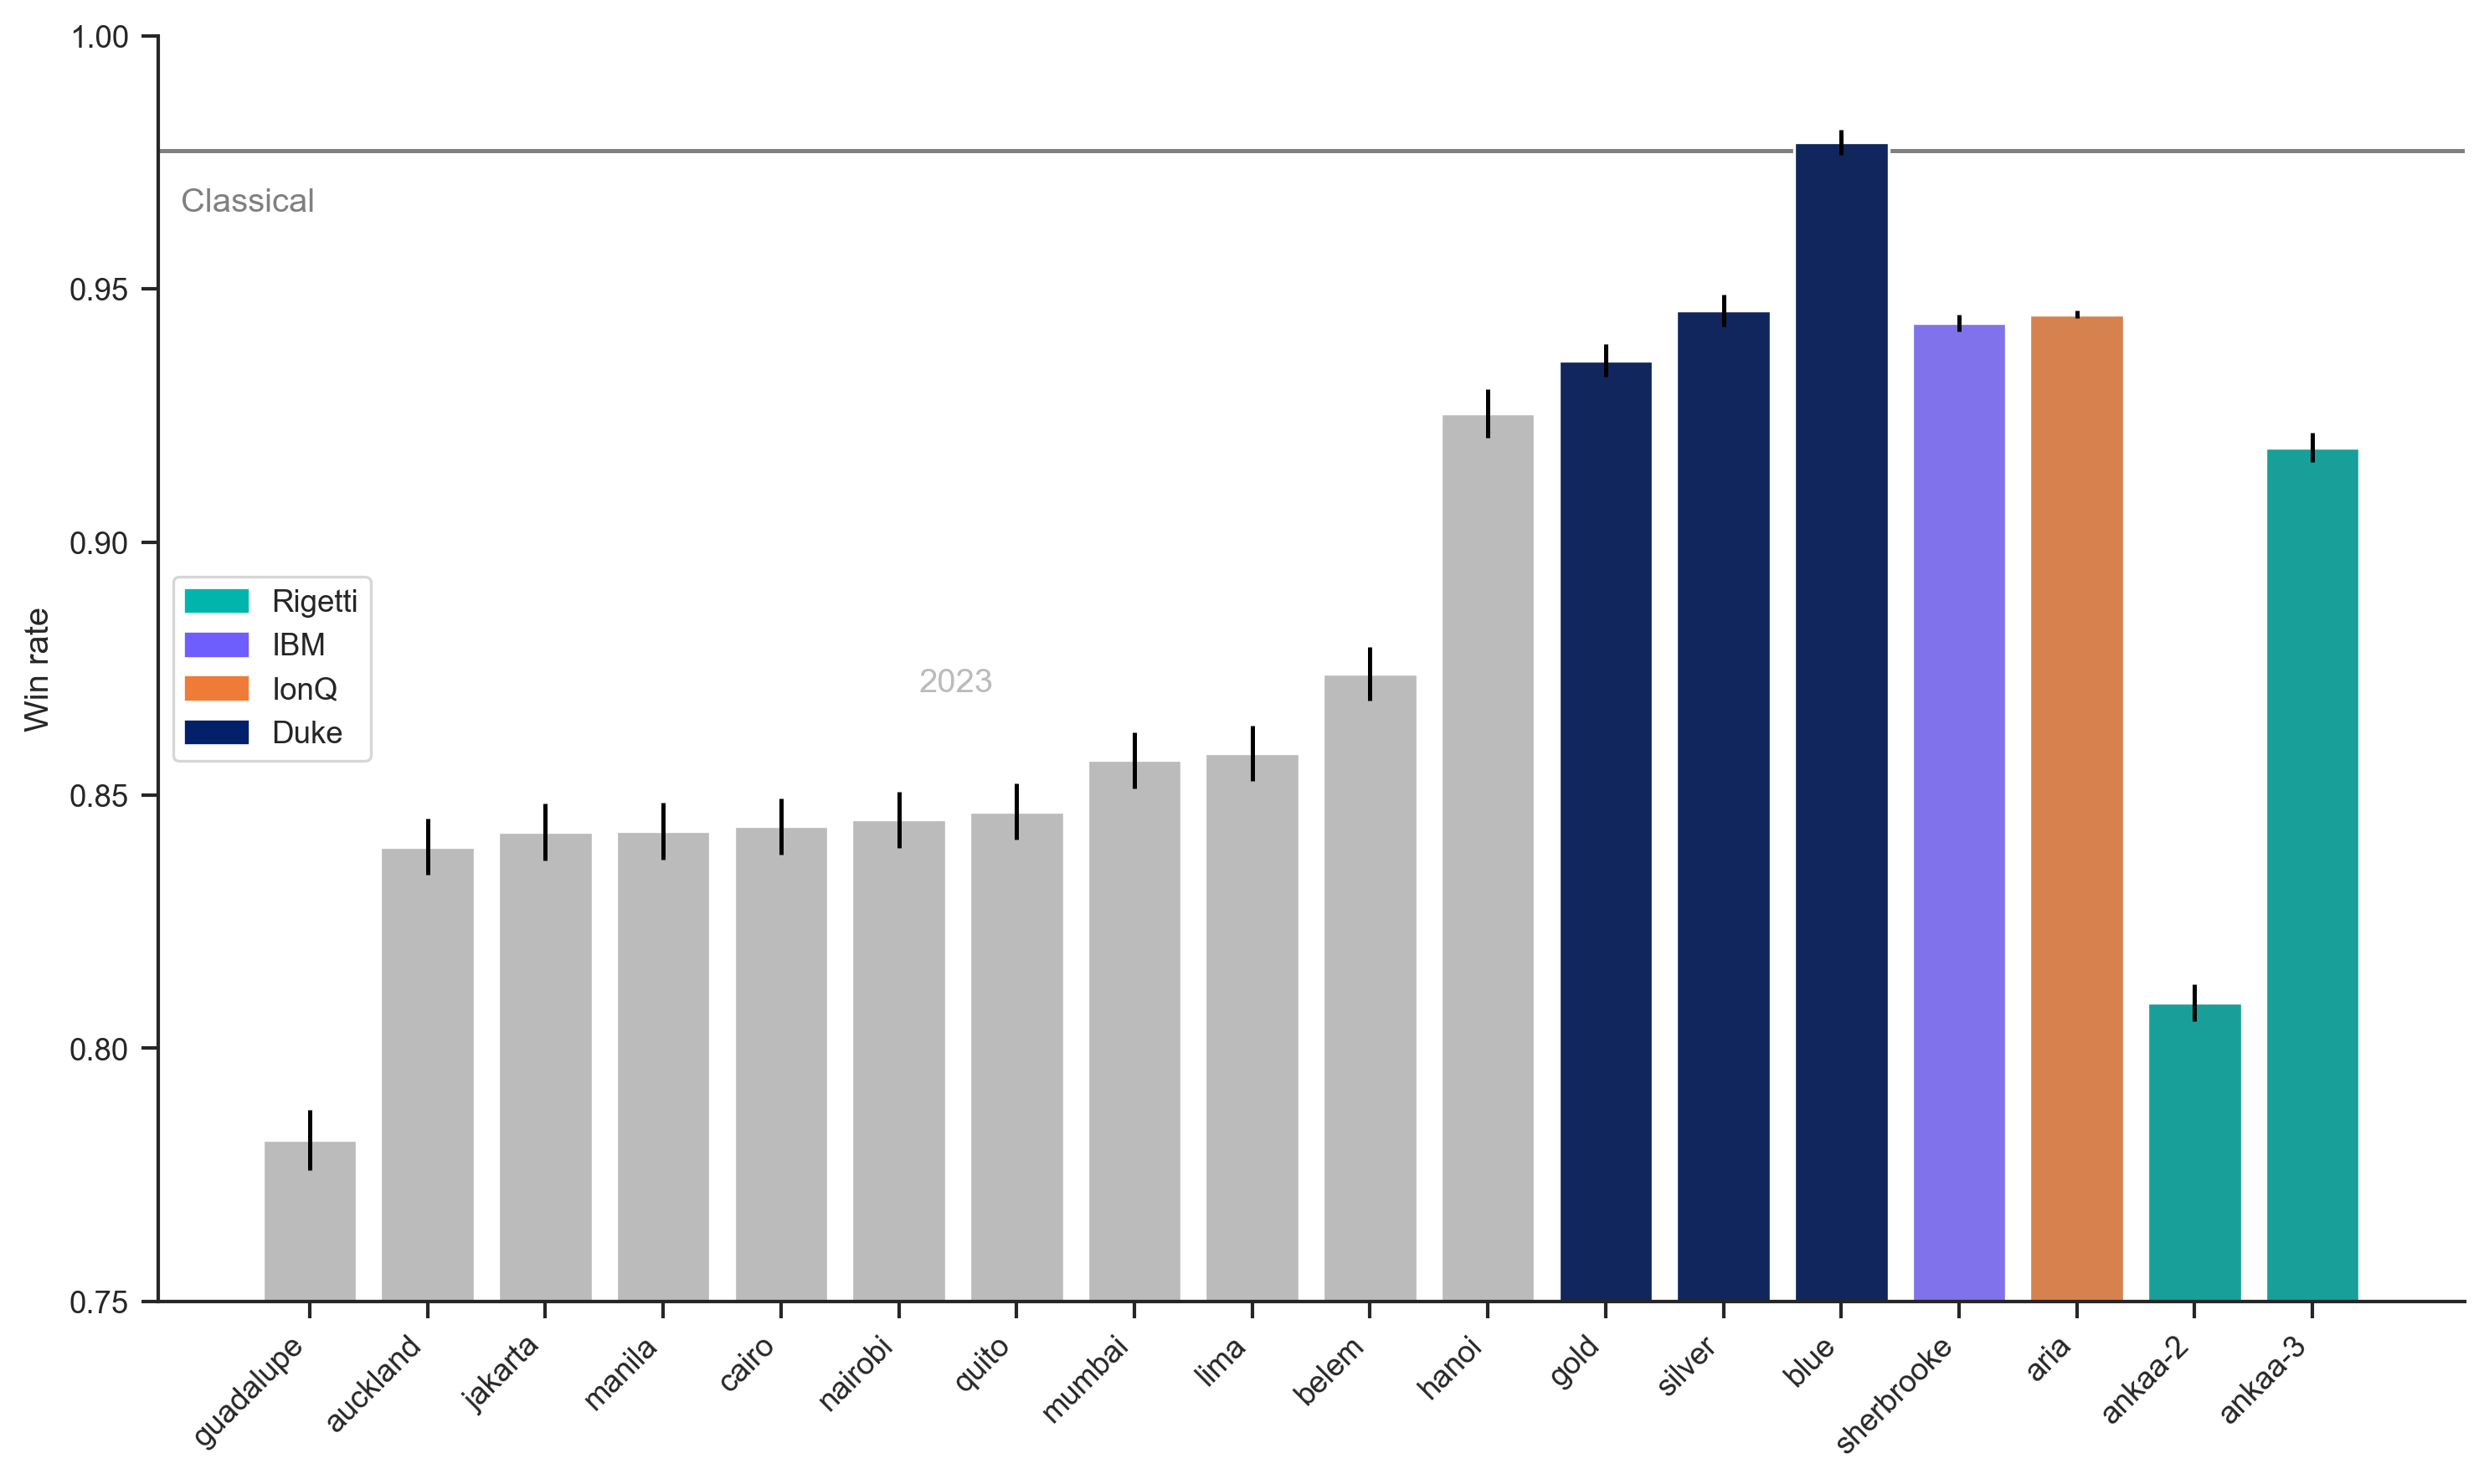

In [15]:
import numpy as np
import matplotlib.patches as mpatches


data = df.reset_index().sort_values(["year", "provider", "winrate"])
# data = df.reset_index().sort_values(["year"])

sns.set_context("paper")
plt.figure(figsize=(10, 6), dpi=300)
ax = sns.barplot(
    data=data,
    x="device",
    y="winrate",
    hue=data.apply(assign_color_idx, axis=1),
    palette=palette,
    legend=False,
)
ax.errorbar(
    np.arange(len(data)),
    data["winrate"],
    yerr=data["ci95"],
    fmt="none",
    color="k",
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Win rate")
plt.ylim(0.75, 1.0)

plt.axhline(86 / 88, color="gray", linestyle="-", zorder=-100)
plt.text(
    0.01,
    0.88,
    "Classical",
    transform=plt.gca().transAxes,
    ha="left",
    va="top",
    color="gray",
)
plt.text(
    0.33,
    0.5,
    "2023",
    transform=plt.gca().transAxes,
    ha="left",
    va="top",
    color=palette[-1],
)

# Generate a legend assigning each color to the brand
legend_artists = []
for brand, color in brand_colors.items():
    # mlines.Line2D is a common proxy artist. We create a line with
    # the desired color and label, but without actual data points ([])
    line = mpatches.Patch(color=color, label=brand_name_proper.get(brand))
    legend_artists.append(line)

# 3. Add the legend to the axes using the created artists
# Matplotlib will use the 'label' attribute of each artist
ax.legend(handles=legend_artists)

sns.despine()
plt.tight_layout()
# plt.savefig("overall_results.pdf")
plt.show()

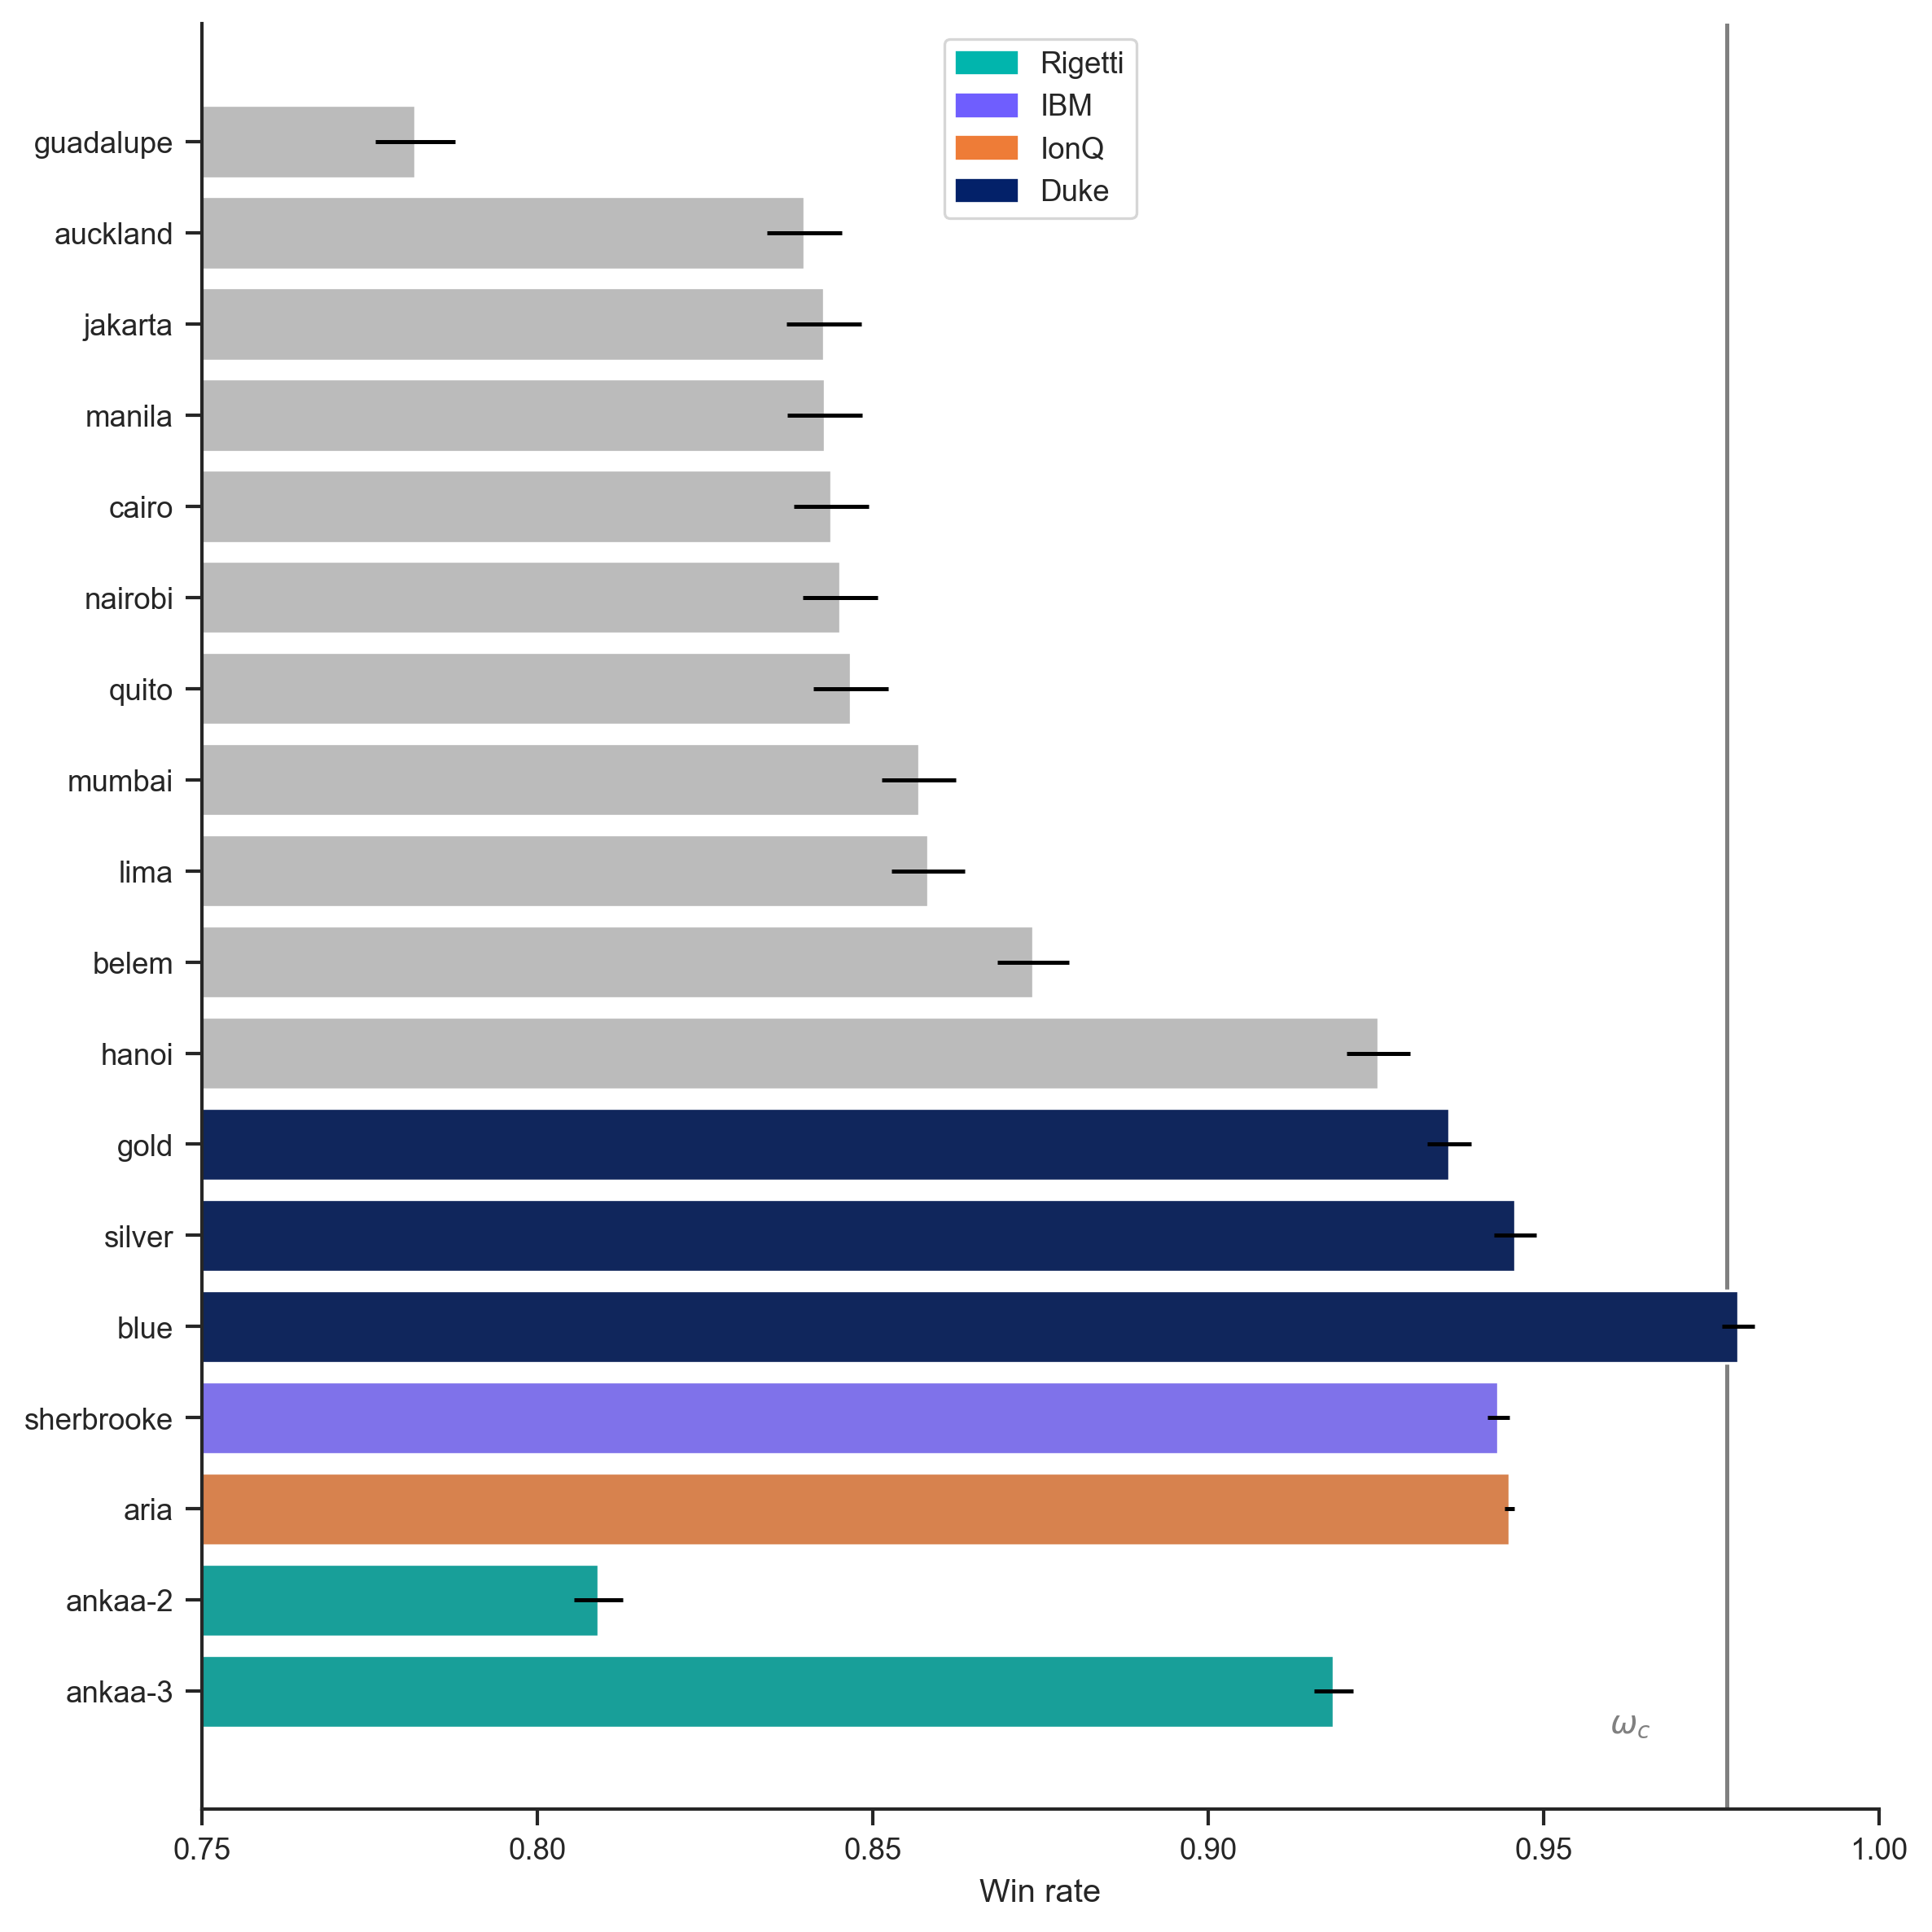

In [54]:
import numpy as np
import matplotlib.patches as mpatches


data = df.reset_index().sort_values(["year", "provider", "winrate"])
# data = df.reset_index().sort_values(["year"])

sns.set_context("paper")
plt.figure(figsize=(8, 8), dpi=300)
ax = sns.barplot(
    data=data,
    x="winrate",
    y="device",
    hue=data.apply(assign_color_idx, axis=1),
    palette=palette,
    legend=False,
)
ax.errorbar(
    data["winrate"],
    np.arange(len(data)),
    xerr=data["ci95"],
    fmt="none",
    color="k",
)

# plt.xticks(rotation=45, ha="right")
plt.xlabel("Win rate")
plt.ylabel("")
plt.xlim(0.75, 1.0)

plt.axvline(86 / 88, color="gray", linestyle="-", zorder=-100)
plt.text(
    76/88,
    1 / len(data),
    r"$\omega_c$",
    transform=plt.gca().transAxes,
    ha="right",
    va="top",
    color="gray",
)
# plt.text(
#     0.5,
#     0.33,
#     "2023",
#     transform=plt.gca().transAxes,
#     ha="left",
#     va="top",
#     color=palette[-1],
# )

# Generate a legend assigning each color to the brand
legend_artists = []
for brand, color in brand_colors.items():
    # mlines.Line2D is a common proxy artist. We create a line with
    # the desired color and label, but without actual data points ([])
    line = mpatches.Patch(color=color, label=brand_name_proper.get(brand))
    legend_artists.append(line)

# 3. Add the legend to the axes using the created artists
# Matplotlib will use the 'label' attribute of each artist
ax.legend(handles=legend_artists)

sns.despine()
plt.tight_layout()
# plt.savefig("overall_results.pdf")
plt.show()

### Frontier plot

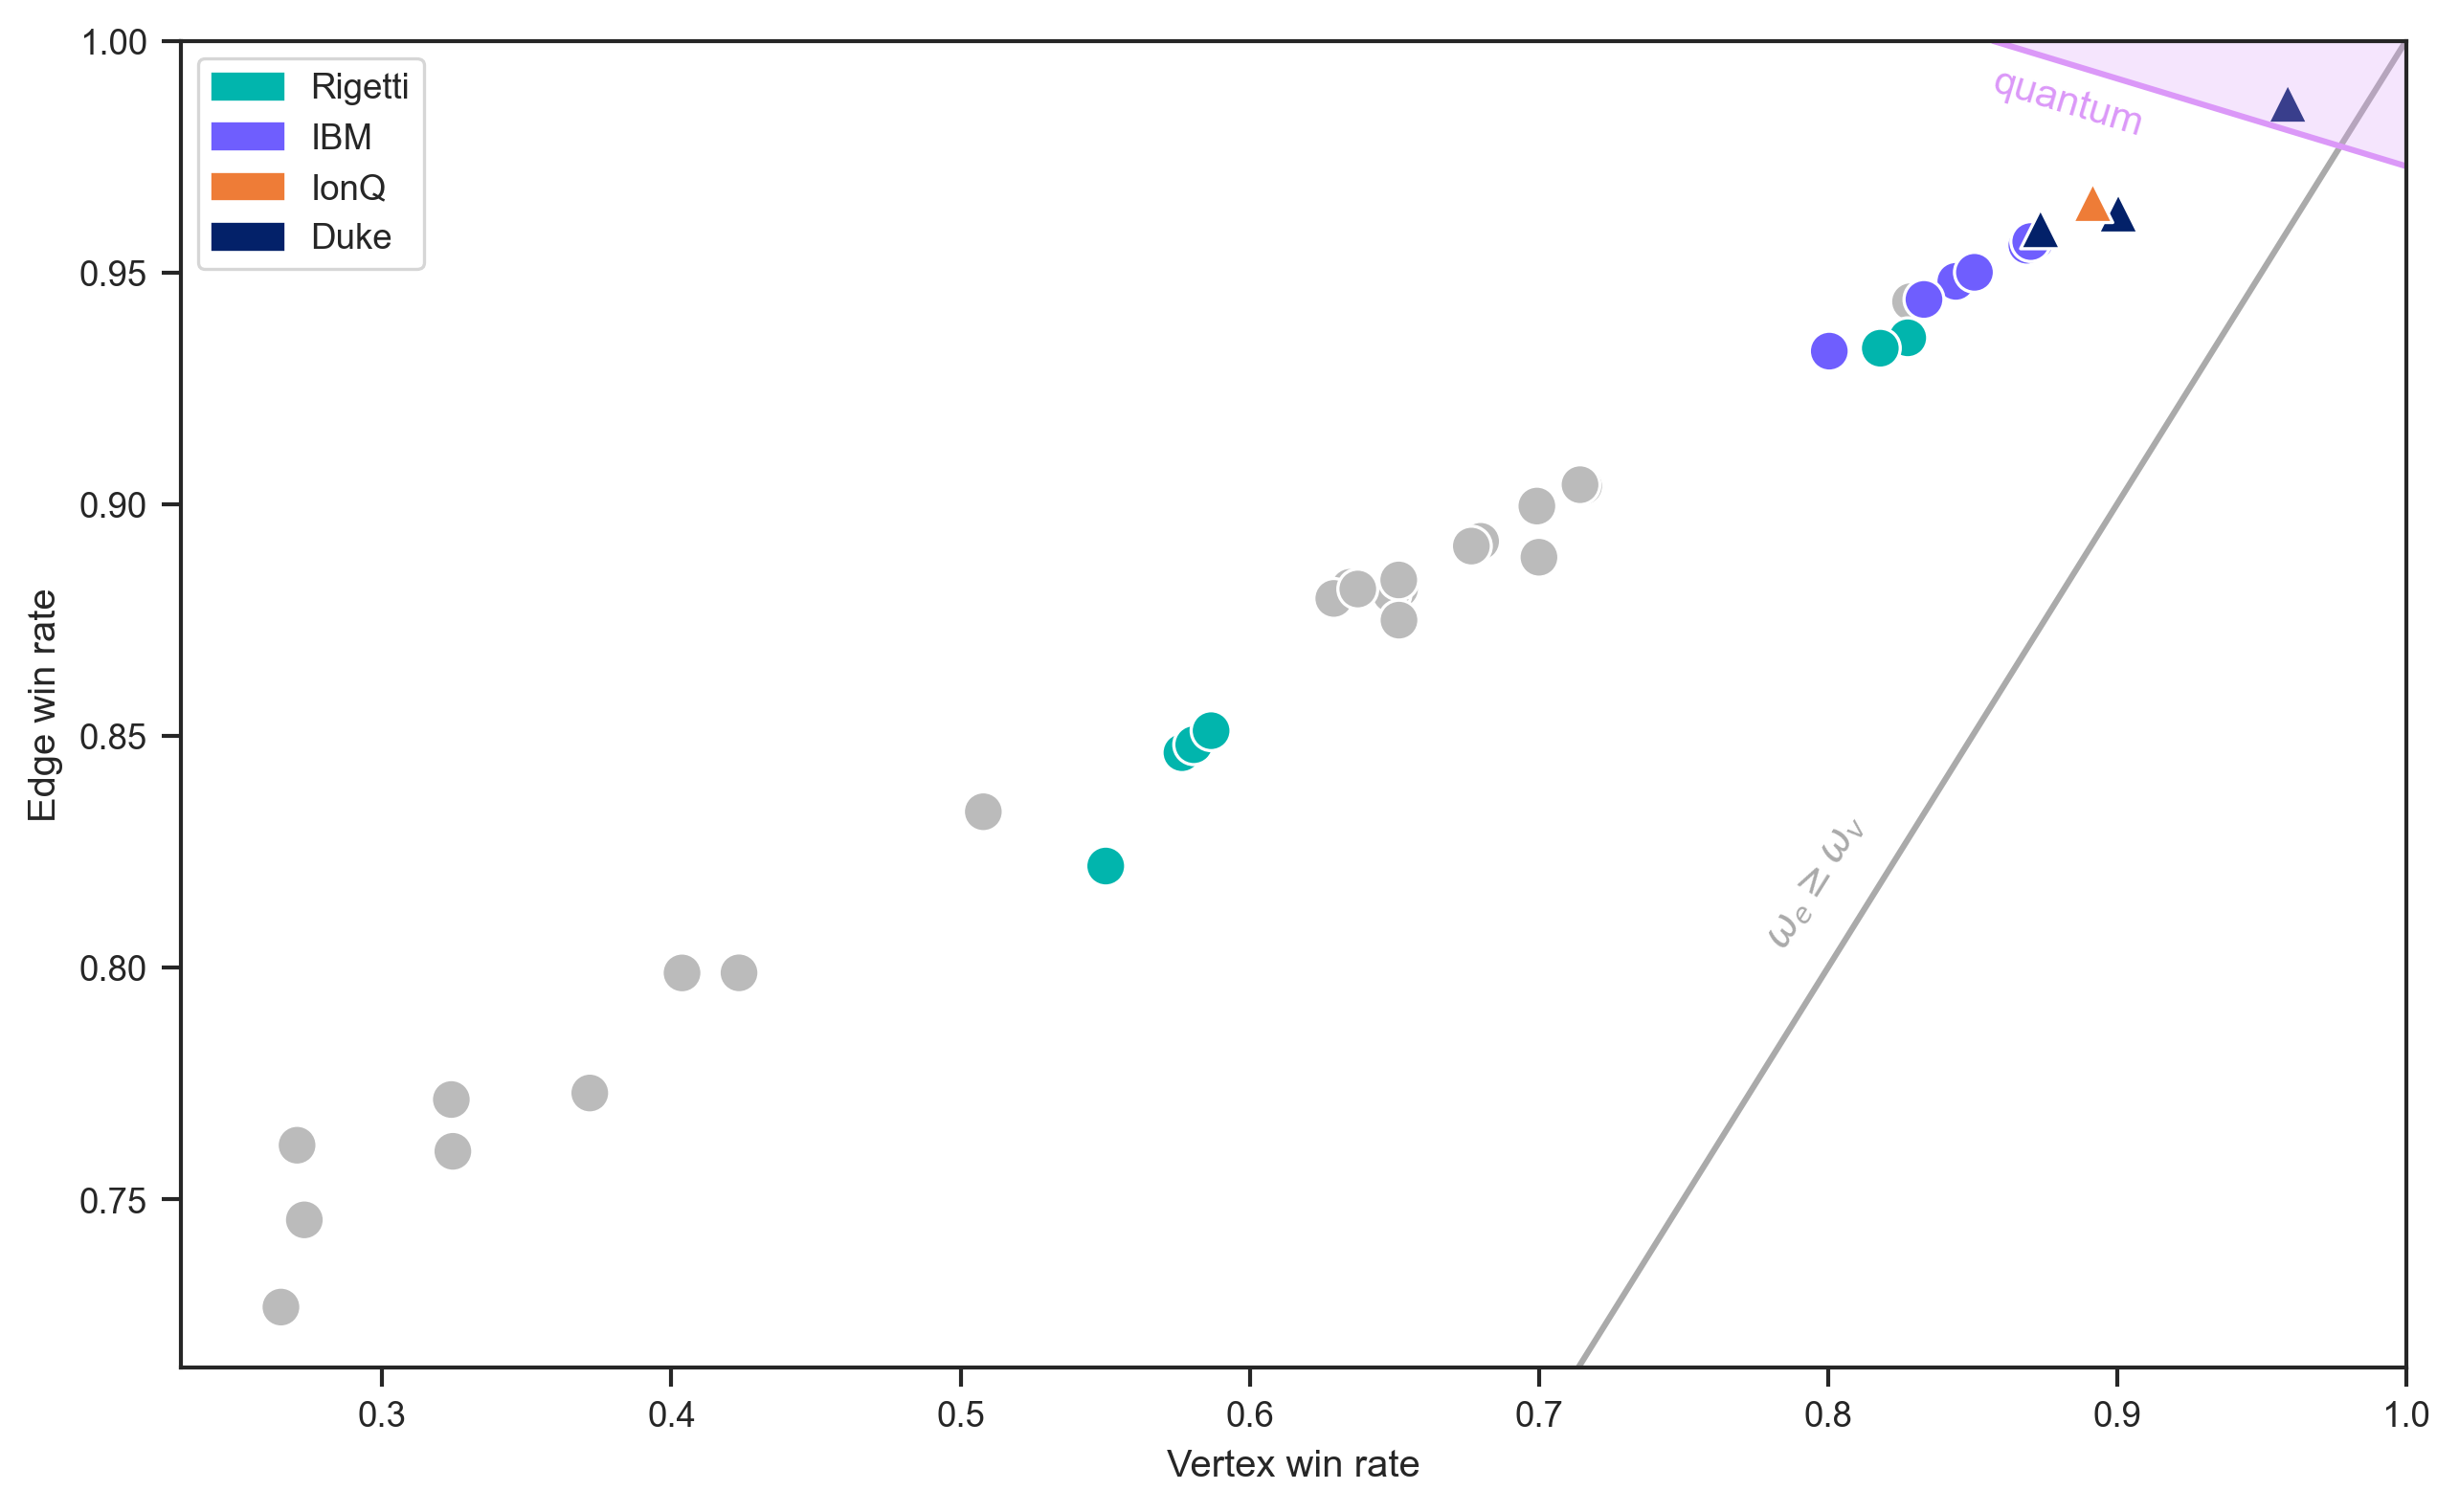

In [31]:
import matplotlib.text as mtext
import seaborn as sns

sns.set_style("ticks")

def assign_marker(row: pd.Series):
    match row.platform:
        case "superconducting":
            return 0
        case "trapped-ion":
            return 1
        case _:
            return 2

# data = df.reset_index().sort_values(["year", "provider", "winrate"])
data = raw_data.reset_index()
# data = data.loc[data.strategy == "bell_pair"]

fig = plt.figure(figsize=(10, 6), dpi=300)
ax = sns.scatterplot(
    data,
    x="vertex_win_rate",
    y="edge_win_rate",
    hue=data.apply(assign_color_idx, axis=1),
    style=data.apply(assign_marker, axis=1),
    markers=["o", "^"],
    palette=palette,
    s=100,
    legend=False,
)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Plot the frontier line, 86/88 <= 14/88 v + 74/88 e
wv, we, wc = 14 / 88, 74 / 88, 86 / 88
coord1 = (1.0, (wc - wv) / we)
coord2 = ((wc - we) / wv, 1.0)
x, y = map(np.array, zip(coord1, coord2))
plt.plot(x, y, "-", c="#DB98F8", linewidth=1.5)
ax.fill_between(x, y, 1, color="#DB98F8", alpha=0.25)
angle_calc_p1_display = ax.transData.transform(
    coord1
)  # This is the "from" point for the angle vector
angle_calc_p2_display = ax.transData.transform(
    coord2
)  # This is the "to" point for the angle vector
delta_y_display = angle_calc_p1_display[1] - angle_calc_p2_display[1]
delta_x_display = angle_calc_p1_display[0] - angle_calc_p2_display[0]
angle = np.arctan2(delta_y_display, delta_x_display)
dx, dy = -0.005 * np.array([-np.sin(angle), np.cos(angle)])
# Add text
ax.text(
    coord2[0] + dx,
    coord2[1] + dy,
    "quantum",
    fontsize=10,
    rotation=np.rad2deg(angle),
    color="#DB98F8",
    va="top",
    ha="left",
)

# Add the asymmetry line
bot = min(xlim[0], ylim[0])
coord1 = np.array([bot, bot])
coord2 = np.array([1, 1])
x, y = zip(coord1, coord2)
angle_calc_p1_display = ax.transData.transform(
    coord1
)  # This is the "from" point for the angle vector
angle_calc_p2_display = ax.transData.transform(
    coord2
)  # This is the "to" point for the angle vector

delta_y_display = angle_calc_p2_display[1] - angle_calc_p1_display[1]
delta_x_display = angle_calc_p2_display[0] - angle_calc_p1_display[0]
angle = np.arctan2(delta_y_display, delta_x_display)
dx, dy = 0.005 * np.array([-np.sin(angle), np.cos(angle)])
plt.plot(x, y, "-", c="#aaaaaa", linewidth=1.5, zorder=-1000)
ax.text(
    0.8 + dx,
    0.8 + dy,
    r"$\omega_e \geq \omega_v$",
    fontsize=10,
    rotation=np.rad2deg(angle),
    color="#aaaaaa",
    va="bottom",
    ha="center",
)


# fix the limits
ax.set_xlim(xlim[0], 1)
ax.set_ylim(ylim[0], 1)


# Generate a legend assigning each color to the brand
legend_artists = []
for brand, color in brand_colors.items():
    # mlines.Line2D is a common proxy artist. We create a line with
    # the desired color and label, but without actual data points ([])
    line = mpatches.Patch(color=color, label=brand_name_proper.get(brand))
    legend_artists.append(line)


# 3. Add the legend to the axes using the created artists
# Matplotlib will use the 'label' attribute of each artist
ax.legend(handles=legend_artists)
ax.set_xlabel("Vertex win rate")
ax.set_ylabel("Edge win rate")
plt.show()